 #                                                       Capstone Project

### import all neccessary library

In [1]:
import os 
import re
import re
import codecs
import mpld3
import glob
import warnings
import operator
import numpy as np
import pandas as pd
import seaborn as sns
from string import punctuation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
## nltk libraies
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
## sklearn Library
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

## Phase 1 Cleaning
1. Read the labelled data from respective folders (pos & neg) and store in data-frames (eg: train_df & test_df) with suitable structure Hint: columns = [review, label]

2. Remove stop words from the data
3. Removing punctuations, HTML tags (like br) etc.
4. Apply Stemming and Lemmatization


In [4]:
## instance of classes
lb = LabelEncoder()  
ps =PorterStemmer()
wl = WordNetLemmatizer()
mb = MultinomialNB()
tfidf = TfidfVectorizer()
sid = SentimentIntensityAnalyzer()

In [5]:

## exceed column width ,no of columns show 
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [6]:
## supvised data Files path 
train_path_pos = r"C:\Users\Gallo DGR\Capstone Project\aclImdb\train\pos"
train_path_neg = r'C:\Users\Gallo DGR\Capstone Project\aclImdb\train\neg'
test_path_pos = r'C:\Users\Gallo DGR\Capstone Project\aclImdb\test\pos'
test_path_neg = r'C:\Users\Gallo DGR\Capstone Project\aclImdb\test\neg'
## unsupervised Files path
unsup_path = r'C:\Users\Gallo DGR\Capstone Project\aclImdb\train\unsup'


### Create all  necessary Function
1. Read data file and create Dataframe
2. make data frames in suitable structure  columns = [review, label]
3. tokenize word 
4. remove stopwords
5. remove punctuations , html tags
6. stemming 
7. lemmenting

In [7]:
## Read dataframe
def read_dataframe(dataframe_name):
    df =pd.read_csv(dataframe_name)
    df.drop('Unnamed: 0',axis=1,inplace=True)
    return df


def create_dataframe(path):
    new_path = glob.glob(os.path.join(path,"*.txt")) 
    df_data =[]
    for f in new_path:
        file = open(f,encoding="utf8")
        df_data.append(file.read())
    
    df = pd.DataFrame(data=df_data,index=range(len(df_data)))
    
    return df

def create_columns(dataframe,col1,col2=None,col2_value=None):
    dataframe.columns = [col1]   
    if col2 !=None:
        dataframe[col2] = [col2_value]*len(dataframe)
    return dataframe

## sent_tokenize , wordtokenize 
def tokenize(series):
    series = series.apply(lambda x:x.lower())
    series = series.apply(lambda x :[word for sent in nltk.sent_tokenize(x) for word in nltk.word_tokenize(sent)])
    return series

## remove stopword
def remove_stopwords(series):
    
    series = series.apply(lambda x: " ".join([word for word in x if word not in stopwords.words('english')]))
    return series

def rmv_pun_html(series):
    #series = series.apply(lambda x: x.lower())
    series= series.apply(lambda x: re.sub('<[^>]*>','',x))
    
    series = series.apply(lambda x :re.sub(r'[^\w\s]',"",x))
    
    
    
    
    series = series.apply(word_tokenize)
    series = series.apply(lambda x:" ".join(word for word in x if word.isalpha()))
    
    return series

## Stemming 
def stem(series,stemmer=ps):
    series = series.apply(word_tokenize)
    series = series.apply(lambda x:" ".join(stemmer.stem(word) for word in x))
    print(f'stemming complete')
    return series

## Lemmatinning 
def lemmentining(series,lemmenter = wl):
    series = series.apply(word_tokenize)
    series = series.apply(lambda x :" ".join(lemmenter.lemmatize(word) for word in x))
    print('Lemmenting complete')
    return series    

### Creating  DataFrame

#### Train_df 

In [ ]:
train_pos_review = create_dataframe(train_path_pos)
train_neg_review = create_dataframe(train_path_neg)

In [ ]:
train_pos_review = create_columns(train_pos_review,"Review","Label","pos")
train_neg_review = create_columns(train_neg_review,"Review","Label","neg")

In [ ]:
train_df = pd.concat([train_pos_review,train_neg_review])

#### Test_df

In [ ]:
test_pos_review = create_dataframe(test_path_pos)
test_neg_review = create_dataframe(test_path_neg)

In [ ]:
test_pos_review = create_columns(test_pos_review,"Review","Label","pos")
test_neg_review = create_columns(test_neg_review,"Review","Label","neg")

In [ ]:
test_df = pd.concat([test_pos_review,test_neg_review])

### save train_df ,test_df to csv 

In [ ]:
train_df.to_csv("train_df.csv")

In [ ]:
test_df.to_csv('test_df.csv')

In [ ]:
## Reading  train_df DataFrame
train_df =read_dataframe('train_df.csv')

In [ ]:
train_df.shape

In [ ]:
## Reading Test_df Dataaframe
test_df = read_dataframe('test_df.csv')

## Required Preprocessing
##### removing stopwords
##### remove Html tag
##### stemming ,lammenting

### Remove Punctuation , Html tag(like br)

In [ ]:
train_df['Review'] = rmv_pun_html(train_df['Review'])

In [ ]:
test_df['Review'] = rmv_pun_html(test_df['Review'])

### Remove stop words 

In [ ]:
## From  Train_df
train_df['Review'] = tokenize(train_df['Review'])
train_df['Review'] = remove_stopwords(train_df['Review'])

In [ ]:
##From Test _df
test_df['Review'] = tokenize(test_df['Review'])
test_df['Review'] = remove_stopwords(test_df['Review'])

## Look to DataFrames

In [ ]:
## Teain_df_pos
train_df.head(2)

In [ ]:
test_df.head(1)

## Applying stemming and Lemmintazion

In [ ]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps =PorterStemmer()
wl = WordNetLemmatizer()

### Either of (or both) stemming and lemmenting can be used but i use only lemmenting for better keywords

### Stemming 

In [ ]:
#train_df['Review'] =stem(train_df['Review'],ps)

In [ ]:
#test_df['Review'] =stem(test_df['Review'],ps)

### Lemmenting 

In [ ]:
train_df['Review'] =lemmentining(train_df['Review'],wl)

In [ ]:
test_df['Review'] =lemmentining(test_df['Review'],wl)

In [ ]:
train_df['Source'] = ['Train']*len(train_df)
test_df['Source'] = ['Test']*len(test_df)

## Saving DataFrame after stemming  and Lemmenting

In [ ]:
train_df.to_csv('clean_train_df.csv')

In [ ]:
test_df.to_csv('clean_test_df.csv')

##  We Can use(load) Clean dataframe for further process to save time(in cleaning)

In [8]:
## reading dataframes 
train_df = read_dataframe('clean_train_df.csv')
test_df = read_dataframe('clean_test_df.csv')

In [9]:
sup_review = pd.concat([train_df,test_df])

## Phase1. Extra Credit

1. Apply feature selection to select most important words/features and drop others (Bonus)

### Feature selection or extracting important word By Extra Tree classifier

In [ ]:
#Countvectorizer
count_vect_1 = CountVectorizer(analyzer='word',stop_words={'english'})  ## max_df=.95,min_df =2,) ## ,
count_vect_1.fit(sup_review['Review'])#.toarray()

In [ ]:
X_trainf = count_vect_1.transform(sup_review[sup_review['Source'].isin(['Train'])].Review)

In [ ]:
y_train = sup_review[sup_review['Source'].isin(['Train'])].Label
y_test = sup_review[sup_review['Source'].isin(['Test'])].Label

In [ ]:
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
## Extra Tree classifiers 
from sklearn.tree import ExtraTreeClassifier
tree_clf = ExtraTreeClassifier()
tree_clf.fit(X_trainf,y_train)

In [ ]:
## important features
important_features = tree_clf.feature_importances_
features_names = count_vect_1.get_feature_names()
features_dict = dict(zip(features_names,important_features))
impt_features = sorted(features_dict.items(), key=operator.itemgetter(1),reverse=True)   # lambda kv: kv[1]

In [ ]:
type(impt_features)

In [ ]:
## 100 important keywords
impt_features

In [ ]:
## Feature selection 
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf,prefit = True)
X_updated = abc.transform(X_trainf)

In [ ]:
print("Total no of Features:" ,X_trainf.shape[1])
print("Selected Features:",X_updated.shape[1])

In [ ]:
sel_features = (impt_features[:X_updated.shape[1]])
sel_features = [a for a,b in sel_features]

## Phase 2  Exploration


1. For labelled data, find the most common words associated with each category (positive & negative)
2. Discover the lowest frequency and highest frequency words


### 1. most common words associated with each category (positive & negative)

###   most common words in Positive review

In [ ]:
movie_review =sup_review

In [ ]:
pos_vect = CountVectorizer(analyzer='word')
pos_frq_vect = pos_vect.fit_transform(movie_review[movie_review.Label.isin(['pos'])].Review)
pos_freq = pd.DataFrame(pos_frq_vect.sum(axis=0),columns =list(pos_vect.get_feature_names()),index=['count']).T
pos_freq.nlargest(10,'count')

### Highest and lowest frequency word in positive reviews

In [ ]:
## Highest freq word 
pos_freq.nlargest(1,'count')

In [ ]:
## lowest freq word 
pos_freq.nsmallest(1,'count')

### Negative review

###  Most common word

In [ ]:
neg_vect = CountVectorizer(analyzer='word')
neg_frq_vect = neg_vect.fit_transform(movie_review[movie_review.Label.isin(['neg'])].Review)
neg_freq = pd.DataFrame(neg_frq_vect.sum(axis=0),columns =list(neg_vect.get_feature_names()),index=['count']).T
neg_freq.nlargest(10,'count')

### Highest and lowest frequency word in negative reviews

In [ ]:
## Highest freq word 
neg_freq.nlargest(1,'count')

In [ ]:
## lowest freq words
neg_freq.nsmallest(1,'count')

### over-all mostcommon word in train_df

In [ ]:
count_vect = CountVectorizer(analyzer='word')
frq_vect = count_vect.fit_transform(movie_review.Review)
freq = pd.DataFrame(frq_vect.sum(axis=0),columns =list(count_vect.get_feature_names()),index=['count']).T
freq.nlargest(10,'count')

### Highest Freq Words and Lowest Frequency words in train_df

In [ ]:
## Highest Freq Words

In [ ]:
freq.nlargest(1,'count')

In [ ]:
## lowest freq word in train_df

In [ ]:
freq.nsmallest(1,'count')

## Extra Credit 

1. Read unlabeled data from respective folder (unsup) and store in unsup_df

2. Create a cluster to separate positive and negative words (bonus) using k-means algorithm


### 1. Reading unsup files


In [ ]:
unsup_df = create_dataframe(unsup_path)

In [ ]:
## Preprocessing 
# create ['Review']columns
# word_tokenize
# remove_stopwords
# remove punctuation,html Tag

In [ ]:
unsup_df = create_columns(unsup_df,'Review')
unsup_df.to_csv('unsup_df.csv')

In [ ]:
unsup_df = read_dataframe('unsup_df.csv')

In [ ]:
unsup_df['Review'] = rmv_pun_html(unsup_df['Review'])

In [ ]:
unsup_df['Review'] = tokenize(unsup_df['Review'])

In [ ]:
unsup_df['Review'] = remove_stopwords(unsup_df['Review']) # 4.42 

In [ ]:
unsup_df['Review']  =lemmentining(unsup_df['Review'],wl)

In [ ]:
unsup_df.head()

In [ ]:
unsup_df.shape

In [ ]:
## save usup_df in csv file
unsup_df.to_csv('clean_unsup_df.csv')

In [ ]:
## Read clean_unsup dataframe
unsup_df = read_dataframe('clean_unsup_df.csv')

### 2.Clustering using Kmeans algorithm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_df=.90,min_df =2,analyzer='word')
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),max_df=.10,min_df =2,analyzer='word')
from sklearn.decomposition import PCA

In [ ]:
doc = unsup_df['Review'].tolist()
X =tfidf.fit_transform(doc)

In [ ]:
X.shape

In [ ]:
unsup_df['pred_score'] = unsup_df['Review'].apply(lambda review : sid.polarity_scores(review)['compound'])

In [ ]:
vader_score = unsup_df['pred_score'].apply(lambda score : 1 if score >=0 else 0)

In [ ]:
##PCA
from sklearn.decomposition import PCA
pca =PCA(n_components=2, random_state=1)

In [ ]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=2,random_state = 0,init='k-means++', max_iter=100, n_init=1 )#KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)
kmeans.labels_[:10]

In [ ]:
vader_score[:10]

In [ ]:
clusters = kmeans.labels_.tolist()

In [ ]:
cluster_colors = {0:'red',1:'blue'}
cluster_names = {0:'Postive',1:'negative'}
#color2  =[color[label] for label in kmeans.labels_]
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()

In [ ]:
for i in range(2):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

###  Visualize cluster 

In [ ]:
dist = 1 - cosine_similarity(X)

In [ ]:
pos = pca.fit_transform(dist)

In [ ]:
xs ,ys = pos[:,0],pos[:,1]

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, )) #title=titles

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
 #   ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

## Phase 3  Visualization

1. Create a word cloud with positive and negative words after cleansing
2. Visualise the positive and negative words distribution (Hint: Histogram

### 1.Create a word cloud with positive and negative words after cleansing

In [ ]:
## word cloud for positive word data
text_pos = " ".join(train_df[train_df['Label']=='pos']['Review'])

In [ ]:
review_cloud = WordCloud().generate(text_pos)
plt.figure()
plt.imshow(review_cloud)

In [ ]:
## word cloud for neg word data
text_neg = " ".join(train_df[train_df['Label']=='neg']['Review'])

In [ ]:
review_cloud = WordCloud().generate(text_neg)
plt.figure()
plt.imshow(review_cloud)

#### 2.Visualise the positive and negative words distribution (Hint: Histogram)

In [ ]:
## Positive Review Words Distribution

In [ ]:
df  =pos_freq.sort_values(by='count',ascending=False).reset_index()
df.columns = ['Word','Count']

In [ ]:
labels = df['Word'][:100]
values = df['Count'][:100]
# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.subplots(figsize=(18,10))
plt.bar(indexes, values)
plt.title('Positive words Distribution Histogram')
plt.xlabel('Word')
plt.ylabel('Count')

# add labels
plt.xticks(indexes + bar_width, labels,rotation = 90)
plt.show()

In [ ]:
pos = pos_frq_vect.sum(axis=0).tolist()
plt.hist(pos[0],bins=5,log =True)
plt.title('Positive words Distribution Histogram')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
df  =neg_freq.sort_values(by='count',ascending=False).reset_index()
df.columns = ['Word','Count']

In [ ]:
labels = df['Word'][:100]
values = df['Count'][:100]
# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.subplots(figsize=(18,10))
plt.bar(indexes, values)
plt.title('Negative words Distribution Histogram')
plt.xlabel('Word')
plt.ylabel('Count')

# add labels
plt.xticks(indexes + bar_width, labels,rotation = 90)
plt.show()

## Extra credit

1. Repeat visualization step 1 & 2 after feature selection and note the impact (Bonus)

In [ ]:
### Wordcloud after Feature Selection

In [ ]:
text = " ".join(key for key,value in sel_features.items())
text_cloud = WordCloud().generate(text)
plt.figure()
plt.imshow(text_cloud)

In [ ]:
sel_features = (impt_features[:X_updated.shape[1]])
sel_features = [k for k,v in sel_features]
x_update = X_updated
df = pd.DataFrame(x_update.sum(axis=0)).T
df.columns = sel_features
df = df.T
df = df.reset_index()
df.columns = ['Word','Count']

In [ ]:
labels , values = df['Word'][:100],df['Count'][:100]

In [ ]:
# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35
plt.subplots(figsize=(18,10))
plt.bar(indexes, values)
plt.title('words Distribution Histogram After Feature Selection')
plt.xlabel('Word')
plt.ylabel('Count')
# add labels
plt.xticks(indexes + bar_width, labels,rotation = 90)
plt.show()

## Phase 4 Hypothesis testing  and Feature Selection
1. Create Hypothesis involving relationships between dependent and independent variables using parametric/non-parametric tests for various machine learning algorithms such as k-means clustering,  classification algorithms.

In [17]:
## Logistics Model
tfidf = TfidfVectorizer(stop_words='english',analyzer='word')
tfidf.fit(sup_review['Review'])
X_train = tfidf.transform(sup_review[sup_review['Source'].isin(['Train'])].Review)
X_test = tfidf.transform(sup_review[sup_review['Source'].isin(['Test'])].Review)

In [ ]:
## Label Encoding 
y_train = lb.fit_transform(train_df['Label'])
y_test  = lb.fit_transform(test_df['Label'])
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

In [10]:
## Kmeans Model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', n_init=10, max_iter=300)

In [28]:
from sklearn import decomposition

n_comp = 2
svd = decomposition.TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd.fit(X_train)
print(svd.explained_variance_ratio_.sum())

train_features = svd.transform(X_train)


0.00755802400150235


In [30]:
pca =PCA(n_components=2).fit(train_features)
word_2d_data = pca.transform(train_features)
kmeans.fit(word_2d_data)
color = np.random.rand(2,3)
pred_color = [color[label] for label in kmeans.labels_]

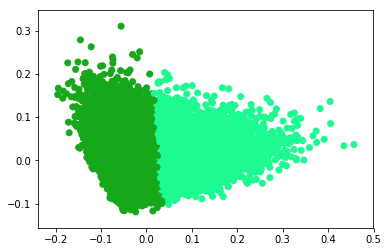

In [31]:
## visualize the cluster
plt.scatter(word_2d_data[:,0],word_2d_data[:,1],c= pred_color)

## Phase 5 Model Building 


1. Supervised Learning: Build a sentiment analysis model to predict positive and negative classes (Score 40)
2. Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews (Score 40)


### 1. Supervised Learning: Build a sentiment analysis model to predict positive and negative classes (Score 40)


In [ ]:
## Read cleaned data
cleaned_train_df = read_dataframe('clean_train_df.csv')
cleaned_test_df = read_dataframe('clean_test_df.csv')

In [ ]:
cleaned_train_df['Source'] = ['Train']*len(cleaned_train_df)
cleaned_test_df['Source'] = ['Test']*len(cleaned_test_df)

In [ ]:
sup_review = pd.concat([cleaned_train_df,cleaned_test_df])

In [ ]:
tfidf = TfidfVectorizer(stop_words='english',analyzer='word')

In [ ]:
tfidf.fit(sup_review['Review'])

In [ ]:
X_train = tfidf.transform(sup_review[sup_review['Source'].isin(['Train'])].Review).toarray()

In [ ]:
X_test = tfidf.transform(sup_review[sup_review['Source'].isin(['Test'])].Review).toarray()

In [ ]:
## Label Encoding 
y_train = lb.fit_transform(cleaned_train_df['Label'])
y_test  = lb.fit_transform(cleaned_test_df['Label'])

####  Naive baye's model 

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
mb = MultinomialNB()
bn = BernoulliNB()
gnb = GaussianNB()

In [ ]:
mb.fit(X_train,y_train)  ## mb is instance MultinomialNB()

In [ ]:
X_test.shape , X_train.shape

In [ ]:
y_pred = mb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
## Bernouli Navie Bayes
bn.fit(X_train,y_train)

In [ ]:
y_pred = bn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
y_pred= gnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

### 2. Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews (Score 40)


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
#unsup_df = read_dataframe('unsup_df.csv')

In [ ]:
tfidf = TfidfVectorizer(max_df=.10,min_df =10,
                        stop_words='english',max_features=100,
                        use_idf=True)
X =tfidf.fit_transform(unsup_df['Review']).toarray()

In [ ]:
unsup_df['pred_score'] = unsup_df['Review'].apply(lambda review : sid.polarity_scores(review)['compound'])

In [ ]:
vader_score = unsup_df['pred_score'].apply(lambda score : 1 if score >=0 else 0)

## Kmeans Model 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', n_init=10, max_iter=300)

In [ ]:
kmeans.fit(X)

#### label 0 means 'pos' and 1 means 'neg' this is obtain by comparision with vader polarity score

In [ ]:
clusters = kmeans.labels_
clusters[:20]

In [ ]:
vader_score[:20]

In [ ]:
dist = 1 - cosine_similarity(X)

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)


In [ ]:

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()

In [ ]:
## Visualizing Cluster
cluster_colors = {0:'green',1:'red'}
cluster_names = {0:'Positive',1:'negative'}

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, )) #title=titles

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
 #   ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

## Extra Credits

1. Supervised Learning: Compare the performance of different machine learning models, at least 2 (Score 40)
2. Unsupervised Learning: Compare the performance of different models, at least 2 (Score 40)
3. Divide the data into 4 clusters to enable finding more classes. Analyse each cluster and try to find the correct label for the new cluster. Repeat clustering until 4 new labels can be found, other than the original labels (positive and negative) (Score 50)
4. Active Learning: Cluster the training dataset and try and find the genre. Manually annotate the cluster and then try to find the labels in the new testing dataset. (Score 50)


### 1. Supervised Learning: Compare the performance of different machine learning models, at least 2 (Score 40)

In [ ]:
## Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
lg.fit(X_train,y_train)

In [ ]:
y_pred = lg.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.svm import LinearSVC
svc  =LinearSVC()

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rnd = RandomForestClassifier()

In [ ]:
clf_rnd.fit(X_train,y_train)

In [ ]:
y_pred = clf_rnd.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

#### Conclusion 

Linearsvc gives better accuaracy comparision to other's(Logistics , Randomforest,NaiveBaye's)

### 2. Unsupervised Learning: Compare the performance of different models, at least 2 (Score 40)

In [ ]:
doc = clean_unsup_df['Review'].tolist()
tfidf = TfidfVectorizer(max_df=.10,min_df =10,
                        stop_words='english',max_features=100,
                        use_idf=True)
X =tfidf.fit_transform(doc).toarray()

### t-SNE Clustering Implementation


In [ ]:
## t-SNE Clustering Implementation
from sklearn.manifold import TSNE

In [ ]:
model = TSNE(learning_rate=100)

In [ ]:
transformed = model.fit_transform(X)

In [ ]:
color = ['green','red']

In [ ]:
# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis,c = color)
plt.show()

### Kmeans Model

In [ ]:
## kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', n_init=10, max_iter=300)

In [ ]:
pca =PCA(n_components=2).fit(X)
word_2d_data = pca.transform(X)

In [ ]:
kmeans.fit(word_2d_data)

In [ ]:
color = np.random.rand(2,3)
pred_color = [color[label] for label in kmeans.labels_]

In [ ]:
## visualize the cluster

In [ ]:
plt.scatter(word_2d_data[:,0],word_2d_data[:,1],c= pred_color)

#### 3. Divide the data into 4 clusters to enable finding more classes. Analyse each cluster and try to find the correct label for the new cluster. Repeat clustering until 4 new labels can be found, other than the original labels (positive and negative) (Score 50

In [ ]:
X = unsup_df['Review']
tifd = TfidfVectorizer(max_df=.10,min_df =10,
                        stop_words='english',max_features=100,
                        use_idf=True)


In [ ]:
X = tfidf.fit_transform(X)

In [ ]:
km = KMeans(n_clusters=4,init='k-means++', n_init=10, max_iter=300)

In [ ]:
km.fit(X)

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()

In [ ]:
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind])

### Topic Modeling & visualize Clusters

In [ ]:
lsa = TruncatedSVD(n_components=4,n_iter=500)
lsa.fit(X)

In [ ]:
print('Concepts Top 10 words ')
for i,comp in enumerate(lsa.components_):
    componentTerms = zip(terms,comp)
    sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:10]
    print("\nConcept",i,":")
    for term in sortedTerms:
        print(term)

In [ ]:
result = lsa.fit_transform(X)
clusters = result.argmax(axis=1)
dist = 1 - cosine_similarity(X)

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)


In [ ]:

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: 'Horror, comedy, family', 
                 1: 'bad, funny, laugh', 
                 2: 'monnk, deadwood, season ,', 
                 3: 'robert, fun, comedy', 
                 }

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, )) #title=titles

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
 #   ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

### 4. Active Learning: Cluster the training dataset and try and find the genre. Manually annotate the cluster and then try to find the labels in the new testing dataset. (Score 50)

In [ ]:
## Train_df 
train_df = read_dataframe('clean_train_df.csv')

In [ ]:
X = train_df['Review']#.values
tfidf = TfidfVectorizer(max_df=.10,min_df =10,
                        stop_words='english',max_features=100,
                        use_idf=True) #  tokenizer=tokenize_and_stem,ngram_range=(1,3) max_df= .50,min_df =10,max_features=100
X = tfidf.fit_transform(X)#.toarray()
terms = tfidf.get_feature_names()

In [ ]:
lsa = TruncatedSVD(n_components=4,n_iter=50)
lsa.fit(X)

In [ ]:
for i,comp in enumerate(lsa.components_):
    componentTerms = zip(terms,comp)
    sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:10]
    print("\nConcept",i,":")
    for term in sortedTerms:
        print(term)

In [ ]:
result = lsa.fit_transform(X)
clusters = result.argmax(axis=1)
dist = 1 - cosine_similarity(X)

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)


In [ ]:

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5:"#800000"}

#set up cluster names using a dict
cluster_names = {0: 'Horror, comedy, family', 
                 1: 'killer, horror, money', 
                 2: 'school, comdey, kids ,', 
                 3: 'origional, fun, love', 
                 4: 'Killed, soldiers, hollywood',
                5:'classic, high-school,  '}

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, )) #title=titles

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
 #   ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

In [ ]:
## Test_df 
test_df = read_dataframe('clean_test_df.csv')

In [ ]:
X = test_df['Review']#.values
tfidf = TfidfVectorizer(max_df=.10,min_df =10,
                        stop_words='english',max_features=100,
                        use_idf=True) #  tokenizer=tokenize_and_stem,ngram_range=(1,3) max_df= .50,min_df =10,max_features=100
X = tfidf.fit_transform(X)#.toarray()
terms = tfidf.get_feature_names()

In [ ]:

result = lsa.transform(X)
clusters = result.argmax(axis=1)
dist = 1 - cosine_similarity(X)

In [ ]:
for i,comp in enumerate(lsa.components_):
    componentTerms = zip(terms,comp)
    sortedTerms = sorted(componentTerms,key=lambda x:x[1],reverse=True)
    sortedTerms = sortedTerms[:10]
    print("\nConcept",i,":")
    for term in sortedTerms:
        print(term)

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)


In [ ]:

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()

In [ ]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5:"#800000"}

#set up cluster names using a dict
cluster_names = {0: 'Horror, comedy, family', 
                 1: 'killer, horror, money', 
                 2: 'school, comdey, kids ,', 
                 3: 'origional, fun, love', 
                 4: 'Killed, soldiers, hollywood',
                5:'classic, high-school,  '}

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, )) #title=titles

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
#for i in range(len(df)):
 #   ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot